Use new grid refinement code (from NY_ ... ) , only Jeff1 ....

19/02/07 : using new light curves from 180713_light_curves_NEW

In [10]:
import numpy as np 
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import celerite
from celerite import terms
from astropy.table import Table
from astropy.table import vstack
from astropy.table import Column
import modules as mod
import os
import imp
imp.reload(mod)

<module 'modules' from '/Users/chris/GradResearch/Paper2_SDSS_PTF_PS1/code/modules.py'>

We take the tested code from `modules.py`

In [12]:
# span the rho grid ...
t_exp = 8 * 365.0 # in days 
rho_min, rho_max,  n_rho = 0.001, 15, 100
rho_grid = np.logspace(np.log10(rho_min), np.log10(rho_max), n_rho)

simulation = 'OGLE'
if simulation is 'SDSS' : 
    r = 17 # mag 
    variance = 0.013**2.0 + np.exp(2 * (r-23.36))
    t = np.loadtxt('t_SDSS_NEW.txt')
    
if simulation is 'OGLE':
    N = 445 
    I = 18 # mag 
    variance = 0.004**2.0 + np.exp(1.63 * (I - 22.55))    
    t =  np.loadtxt('t_OGLE_NEW.txt')
print(simulation,' noise stdev ', np.sqrt(variance))

# set the light curve directory 
lcDir = '../data_products/Simulated_DRW_Kozlowski/'+\
         simulation+'/180713_light_curves_NEW/'#'/180404_light_curves/'

# set the output directory 
resDir  = '../data_products/Simulated_DRW_Kozlowski/'+\
         simulation+'/190208_results_celerite/'
if not os.path.exists(resDir):
    os.makedirs(resDir)
     
# set the limits :  beyond the input tau, which 
# go from 2.91 days, to 43 800 days  ( for the rho_grid running 
# from 0.001 to 15,  and the experiment length equal to 8 * 365 days )
sig_lims = [0.01, 1.0]  ; tau_lims = [1,45000]

# read in the light curves
for i in range(len(rho_grid)): 
    sigma_in = 0.2  
    # just for initializing the celerite kernel - 
    # doesn't have to be even close to the true value .
    rho_in = rho_grid[i]
    tau_in = rho_in * t_exp
    # for each rho, read in  N light curves 
    for j in range(100): 
        fname = 'DRW_rho-' + str(i).zfill(3)+'_'+str(j).zfill(3)+'.txt'
        
        # load the ideal lc , made with mod.sim_DRW_lightcurve()
        y = np.loadtxt(lcDir+fname)
        # add noise 
        noise = np.random.normal(loc=0,scale=np.sqrt(variance),size=len(t))
        y += noise +10 # eq.2 Kozlowski+2017
        yerr = np.ones_like(t)* np.sqrt(variance)
        
        results = {}
        # define which priors we would like to try ... 
        
        for prior in ['Jeff1', 'Jeff2']:
            results[prior] = {}

            # MAP estimate        
            sigmaMAP, tauMAP,gp = mod.find_celerite_MAP(t,y,yerr, sigma_in, tau_in,
                                    prior=prior,set_bounds=True , sig_lims=sig_lims  , 
                                    tau_lims=tau_lims ,verbose=False)

            # store results from MAP  and input 
            results[prior]['sigma_MAP'] = sigmaMAP
            results[prior]['tau_MAP'] = tauMAP
            results[prior]['rho_in'] = rho_in
            results[prior]['tau_in'] = tau_in

            # expectation from grid  
            Ngrid = 60  ; scale = 'log'
            sigma_grid, tau_grid = mod.make_grid(scale,sig_lims, tau_lims,Ngrid) 
            logP = mod.evaluate_logP(sigma_grid, tau_grid,y,gp,prior)

            # store the initial sigma grid and log Posterior 
            results[prior]['logPosterior'] = logP
            results[prior]['sigma_grid'] = sigma_grid
            results[prior]['tau_grid'] = tau_grid
            
            # find the expectation value 
            sigmaEXP, tauEXP = mod.find_expectation_value(logP, sigma_grid, 
                                    tau_grid)
            
            results[prior]['sigma_EXP'] = sigmaEXP
            results[prior]['tau_EXP'] = tauEXP
            
        # save in  a file ...
        name = fname[:-4]+'_logP.npy'
        np.save(resDir  + name, results)
        if j % 10 == 0 :  # only print every tenth .... 
            print(simulation, ' Saved logP (and MAP) dic as %s'%name)

        

OGLE  noise stdev  0.0248445133097
OGLE  Saved logP (and MAP) dic as DRW_rho-000_000_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-000_010_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-000_020_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-000_030_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-000_040_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-000_050_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-000_060_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-000_070_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-000_080_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-000_090_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-001_000_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-001_010_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-001_020_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-001_030_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-001_040_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-001_050_logP.npy
OGLE  Saved logP (and

OGLE  Saved logP (and MAP) dic as DRW_rho-013_090_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-014_000_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-014_010_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-014_020_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-014_030_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-014_040_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-014_050_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-014_060_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-014_070_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-014_080_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-014_090_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-015_000_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-015_010_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-015_020_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-015_030_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-015_040_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-015_050_logP.n

OGLE  Saved logP (and MAP) dic as DRW_rho-027_080_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-027_090_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-028_000_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-028_010_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-028_020_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-028_030_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-028_040_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-028_050_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-028_060_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-028_070_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-028_080_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-028_090_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-029_000_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-029_010_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-029_020_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-029_030_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-029_040_logP.n

OGLE  Saved logP (and MAP) dic as DRW_rho-041_070_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-041_080_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-041_090_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-042_000_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-042_010_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-042_020_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-042_030_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-042_040_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-042_050_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-042_060_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-042_070_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-042_080_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-042_090_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-043_000_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-043_010_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-043_020_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-043_030_logP.n

OGLE  Saved logP (and MAP) dic as DRW_rho-055_060_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-055_070_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-055_080_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-055_090_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-056_000_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-056_010_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-056_020_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-056_030_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-056_040_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-056_050_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-056_060_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-056_070_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-056_080_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-056_090_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-057_000_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-057_010_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-057_020_logP.n

OGLE  Saved logP (and MAP) dic as DRW_rho-069_050_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-069_060_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-069_070_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-069_080_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-069_090_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-070_000_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-070_010_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-070_020_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-070_030_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-070_040_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-070_050_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-070_060_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-070_070_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-070_080_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-070_090_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-071_000_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-071_010_logP.n

OGLE  Saved logP (and MAP) dic as DRW_rho-083_040_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-083_050_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-083_060_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-083_070_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-083_080_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-083_090_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-084_000_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-084_010_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-084_020_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-084_030_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-084_040_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-084_050_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-084_060_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-084_070_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-084_080_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-084_090_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-085_000_logP.n

OGLE  Saved logP (and MAP) dic as DRW_rho-097_030_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-097_040_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-097_050_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-097_060_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-097_070_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-097_080_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-097_090_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-098_000_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-098_010_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-098_020_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-098_030_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-098_040_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-098_050_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-098_060_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-098_070_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-098_080_logP.npy
OGLE  Saved logP (and MAP) dic as DRW_rho-098_090_logP.n

In [3]:
import numpy as np
t = np.array([1,3,10,40])
tau = 575/365.
rho=  tau / t 
print(np.log10(rho))

[ 0.19737498 -0.27974627 -0.80262502 -1.40468501]


OGLE  noise stdev  0.0248445133097
106.204820949
[-3.21887582 -4.6653695 ]
sig_lims: [0.01, 1.0] tau_lims: [1, 45000]
[(-9.2103403719761818, 0.0), (-10.714417768752456, 0.0)]
sigma_fit 0.122676863654 tau_fit 92.2067663122
[-3.21887582 -4.6653695 ]
sig_lims: [0.01, 1.0] tau_lims: [1, 45000]
[(-9.2103403719761818, 0.0), (-10.714417768752456, 0.0)]
sigma_fit 0.122676863654 tau_fit 92.2067663122
np.log10(rho out MAP) =  -1.50062005985
sigma_exp= 0.132009090527
tau_exp= 118.029090082


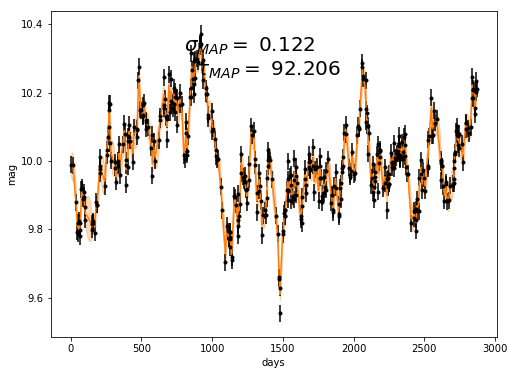

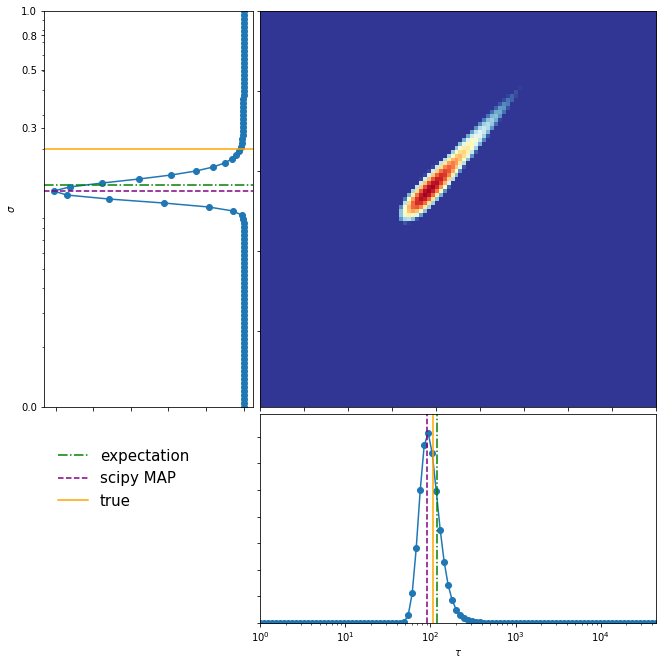

In [15]:
%matplotlib inline

simulation = 'OGLE'
if simulation is 'OGLE':
    N = 445 
    I = 18 # mag 
    variance = 0.004**2.0 + np.exp(1.63 * (I - 22.55))    
    t =  np.loadtxt('t_OGLE.txt')
print(simulation,' noise stdev ', np.sqrt(variance))

# set the light curve directory 
lcDir = '../data_products/Simulated_DRW_Kozlowski/'+\
         simulation+'/180404_light_curves/'
    
#
# Plot the log Posterior 
#
# read in the light curves
#for i in range(len(rho_grid)): 
i = 37 ; j  = 1 
sigma_in = 0.2  
# just for initializing the celerite kernel - 
# doesn't have to be even close to the true value .
rho_in = rho_grid[i]
tau_in = rho_in * t_exp
print(tau_in)
# for each rho, read in  N light curves 
#for j in range(10,100): 
fname = 'DRW_rho-' + str(i).zfill(3)+'_'+str(j).zfill(3)+'.txt'

# load the ideal lc , made with mod.sim_DRW_lightcurve()
y = np.loadtxt(lcDir+fname)
# add noise 
noise = np.random.normal(loc=0,scale=np.sqrt(variance),size=len(t))
y += noise +10 # eq.2 Kozlowski+2017
yerr = np.ones_like(t)* np.sqrt(variance)

results = {}
# define which priors we would like to try ... 

prior = 'Jeff1'

# MAP estimate        
sigmaMAP, tauMAP,gp = mod.find_celerite_MAP(t,y,yerr, sigma_in, tau_in,
                        prior=prior,set_bounds=True , sig_lims=sig_lims  , 
                        tau_lims=tau_lims ,verbose=True)

# expectation from grid  
Ngrid = 100  ; scale = 'log'
sigma_grid, tau_grid = mod.make_grid(scale,sig_lims, tau_lims,Ngrid) 
logP = mod.evaluate_logP(sigma_grid, tau_grid,y,gp,prior)

# find the expectation value 
sigmaEXP, tauEXP = mod.find_expectation_value(logP, sigma_grid, 
                        tau_grid)

sigma_fit, tau_fit,gp = mod.find_celerite_MAP(t,y,yerr, sigma_in, 
                                              tau_in,prior='Jeff1', set_bounds = True , 
                                              sig_lims = sig_lims  , 
                      tau_lims =tau_lims, verbose = True )

print('np.log10(rho out MAP) = ', np.log10(tau_fit / t_exp))
# plot the prediction
mod.plot_gp_prediction(t,y,yerr,gp,sigma_fit, tau_fit,
                     savefig=False, figname='')

# plot the logP
logP, sigma_exp, tau_exp  = mod.plot_logP(logP, sigma_grid, tau_grid, 
                            sigma_fit, tau_fit,  
                     sigma_in, tau_in, scale,verbose=True,
                                         savefig=True, 
                                figname='OGLE_LC_i-'+str(i)+'j-'+str(j)+'_logP.png')
# evaluate 

In [6]:
import imp
imp.reload(mod)

<module 'modules' from '/Users/chris/GradResearch/Paper2_SDSS_PTF_PS1/code/modules.py'>

In [7]:
mod.plot_logP??